In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator, Aer
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *


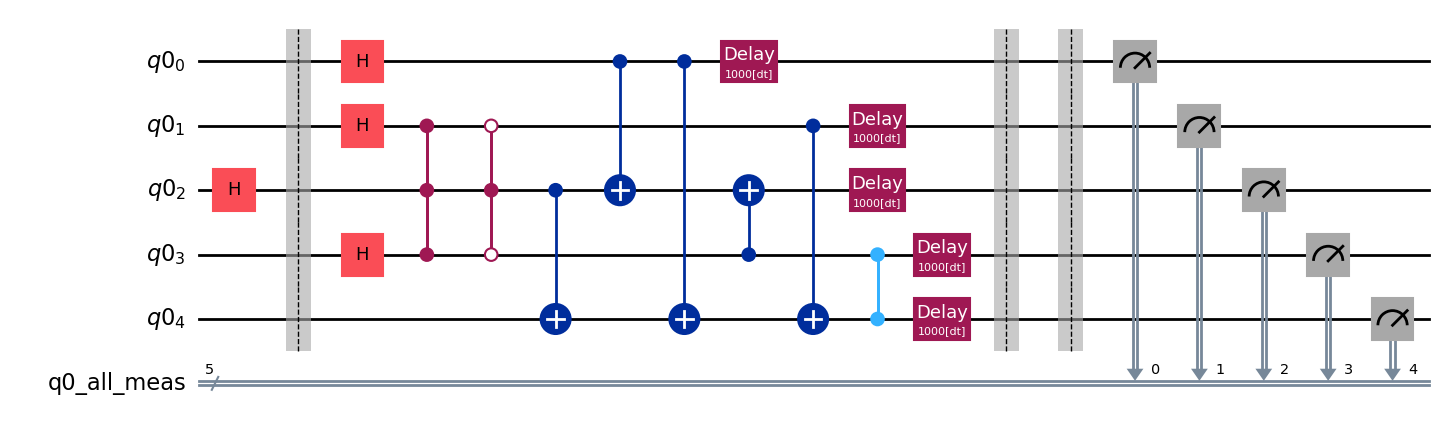

In [2]:


def load_circuit(delay):
    qc = FiveQbPerfectCodeCircuit(1)

    qc.initial_state(state='+')
    qc.encode()
    # qc.x() # activar para probar el estado 1 logico
    # qc.h()
    qc.delay(delay)
    qc.measure_all()
    # qc.logical_measure(basis='Z')

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [3]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [4]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 11
Transpiled Circuit Depth: 137


In [5]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [6]:
# t_array = [2_500, 5_000, 10_000, 20_000, 80_000, 160_000, 320_000]
# t_array = [t*10_000 for t in range(0, 21)]
# t_array = [t*2_500 for t in range(0, 13)]
t_array = [t*4_000 for t in range(0, 6)]
print([round(t*dt * 10**(-3),2) for t in t_array])

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0]


In [ ]:
# circuits = []

# for t in t_array:

#     qc = load_circuit(t)

#     isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=10,
#                                 initial_layout = [41, 53, 40, 42, 60]
#                                 )
#     circuits.append(isa_circuit)

#     print(f"Circuit Depth: {circuits[-1].depth()}")
#     print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
#     print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
#     # c.draw(output='mpl')

Circuit Depth: 124
Delay Duration: 0.0 us
Total Duration: 26.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 125
Delay Duration: 2.0 us
Total Duration: 28.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 125
Delay Duration: 4.0 us
Total Duration: 30.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 125
Delay Duration: 6.0 us
Total Duration: 32.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 125
Delay Duration: 8.0 us
Total Duration: 34.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 125
Delay Duration: 10.0 us
Total Duration: 36.38 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49928\2367973303.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [7]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

In [11]:
def statevector_simulation(circuit):
    simulator = AerSimulator()
    qct = transpile(circuit, simulator)

    state = np.array(Aer.get_backend('statevector_simulator').run(qct, shots=1).result().get_statevector())

    for i in range(len(state)):
        b = format(i, f'0{5}b')
        if abs(state[i]) > 0.0001:
            c = np.round(state[i],3)
            print(b[::-1], c.real)

test_circuit = FiveQbPerfectCodeCircuit(1)
test_circuit.initial_state(state='+')
test_circuit.encode()

statevector_simulation(test_circuit.physical_circuit)

00000 0.25
10000 -0.25
01100 0.25
11100 0.25
01010 -0.25
11010 0.25
00110 0.25
10110 0.25
01001 0.25
11001 0.25
00101 -0.25
10101 0.25
00011 -0.25
10011 -0.25
01111 -0.25
11111 0.25


In [8]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
# job = service.job('cxyqpc1y1ae0008ngmxg') # t_array = [t*10_000 for t in range(0, 21)]
# job = service.job('cy8ta6gnrmz00085xz9g') # encoder universal mejorado  <----
# job = service.job('') # t_array = [t*2_500 for t in range(0, 13)]
job = service.job('cyhc14m7v8tg008xfmc0') # shots = 3200, t_array = [t*4_000 for t in range(0, 6)]

pub_result = job.result()


In [ ]:
results = extract_results_IBM(pub_result, type='percentage')['q0_all_meas']

In [15]:

delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 85	 108	 130	 76	 98	 110	 89	 74	 100	 83	 75	 102	 70	 104	 125	 94	 115	 92	 81	 139	 86	 137	 90	 75	 209	 57	 71	 119	 89	 92	 108	 117
 2		 68	 97	 106	 78	 86	 110	 89	 79	 127	 105	 74	 90	 81	 97	 116	 86	 125	 75	 79	 159	 88	 133	 55	 106	 208	 65	 71	 113	 114	 106	 98	 116
 4		 76	 107	 120	 68	 109	 100	 101	 79	 126	 73	 84	 97	 74	 80	 109	 65	 125	 85	 95	 145	 103	 164	 59	 93	 218	 79	 73	 106	 90	 97	 94	 106
 6		 117	 97	 103	 74	 112	 111	 105	 88	 108	 94	 81	 79	 79	 113	 141	 64	 151	 103	 75	 131	 94	 147	 65	 97	 187	 59	 62	 94	 94	 89	 102	 84
 8		 111	 122	 108	 75	 103	 100	 92	 78	 128	 106	 80	 81	 69	 114	 109	 70	 138	 116	 76	 118	 

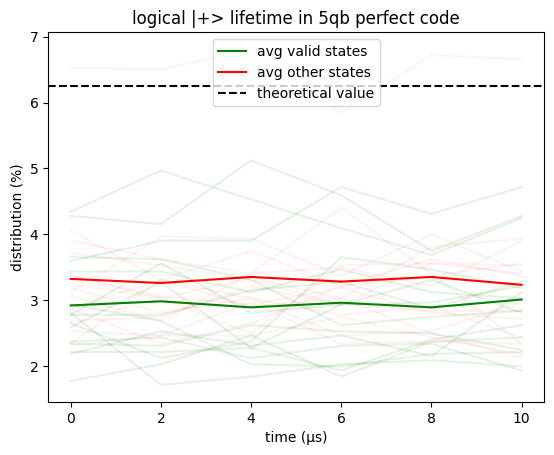

In [16]:
import matplotlib.pyplot as plt
import math

valid_states = ["00000", "11100", "10011", "01111", "11010", "00110", "01001", "10101",
                "11111", "00011", "10000", "01100", "11001", "00101", "01010", "10110"]


x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]
    
    if s in valid_states:
        # if s == '00000':
        #     plt.plot(x, y[s], alpha=0.2, color='black')
        #     continue
        plt.plot(x, y[s], alpha=0.1, color='green')
    else:
        plt.plot(x, y[s], alpha=0.05, color='red')


plt.plot(x, [np.sum([r[s] for s in valid_states])/16 for r in results], label='avg valid states', color='green')
# plt.plot(x, [np.sum([r[s] for s in possible_valid_states if s != '00000'])/7 for r in results], label='avg valid states', color='black')
plt.plot(x, [np.sum([r[s] for s in states if s not in valid_states])/16 for r in results], label='avg other states', color='red')

plt.axhline(y=100/16, color='k', linestyle='--', label='theoretical value')
    
# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb perfect code')
plt.legend()

# Display the plot
plt.show()

avg: 47.141
std: 0.726


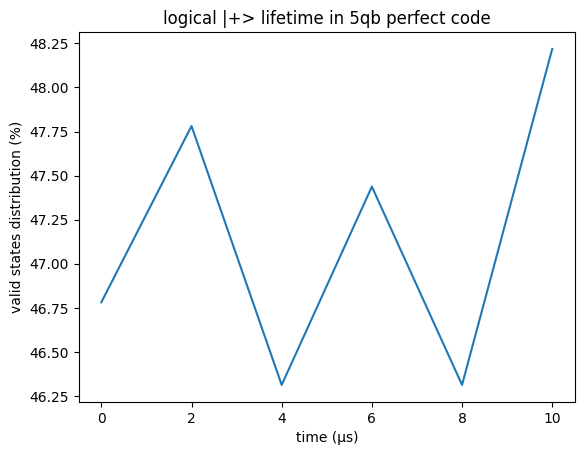

In [16]:

sum_valid_states = [np.sum([r[s] for s in valid_states]) for r in results]

plt.plot(x, sum_valid_states)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('valid states distribution (%)')
plt.title('logical |+> lifetime in 5qb perfect code')

print(f'avg: {round(np.mean(sum_valid_states),3)}')
print(f'std: {round(np.std(sum_valid_states),3)}')

# Display the plot
plt.show()

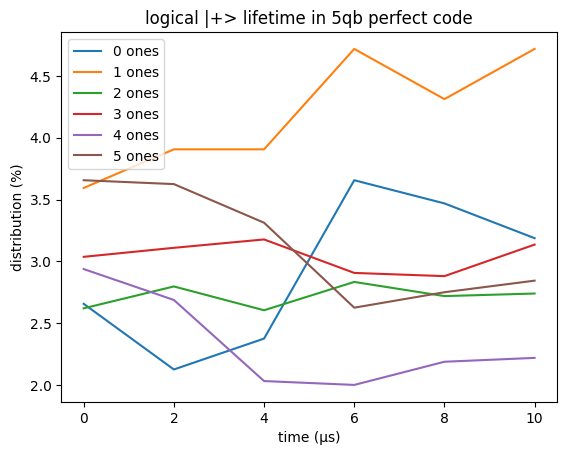

In [17]:

for n in [0,1,2,3,4,5]:

    n_ones_states = [s for s in valid_states if np.sum([int(i) for i in s]) == n]
    plt.plot(x, [np.sum([r[s] for s in n_ones_states])/len(n_ones_states) for r in results], label=f"{n} ones")


# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb perfect code')
plt.legend()

# Display the plot
plt.show()

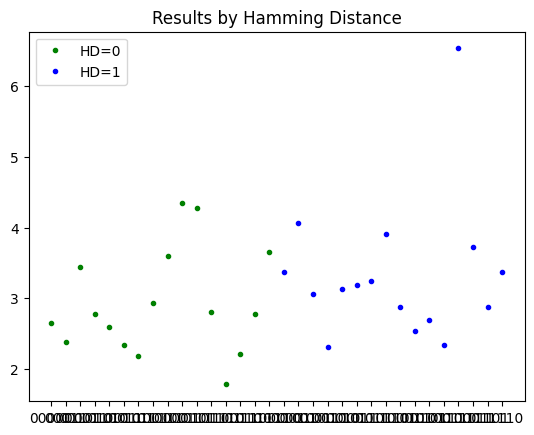

In [14]:
plot_results_hamming_distance(results[0], 5, valid_states)

TVD

In [19]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


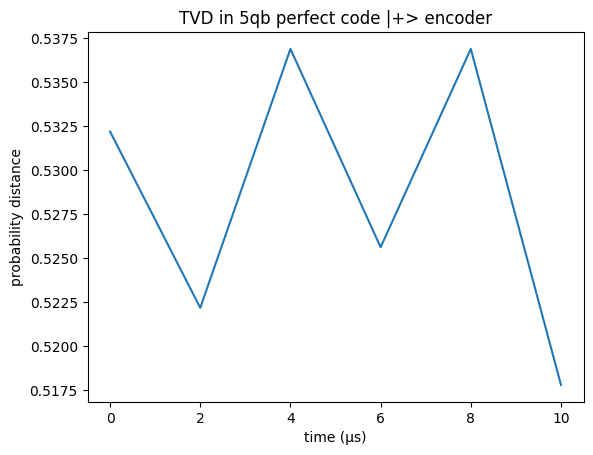

In [20]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in 5qb perfect code |+> encoder')

# Display the plot
plt.show()

In [21]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 51.78%
